In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
X,y = make_regression(n_samples=100, n_features=2,n_informative=2, n_targets=1, noise=50)

In [4]:
df = pd.DataFrame({'feature1':X[:,0],
                  'feature2':X[:,1],
                   'target':y})

In [5]:
df.head()

,feature1,feature2,target
0,-0.336621,0.076736,-56.051171
1,-0.774334,0.017913,4.705383
2,-0.899001,-0.412412,-80.712164
3,0.872647,0.736013,88.492111
4,-0.330576,-0.245409,-76.601963


In [6]:
df.shape

(100, 3)

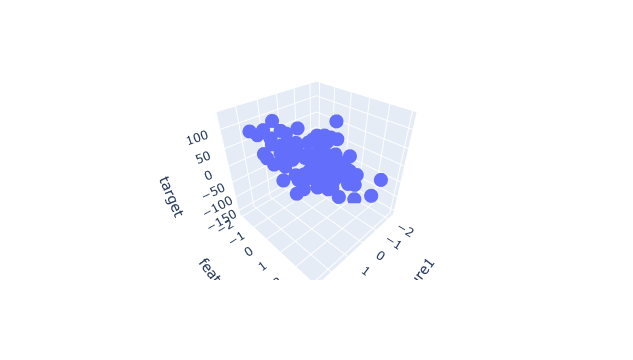

In [10]:
fig = px.scatter_3d(df, x='feature1',y='feature2',z='target')

fig.show()

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred=lr.predict(X_test)

In [23]:
print("MAE      :", mean_absolute_error(y_test,y_pred))
print('MSE      :', mean_squared_error(y_test,y_pred))
print('R2 Score :',r2_score(y_test,y_pred))

MAE      : 35.06983280905964
MSE      : 1659.1157444957003
R2 Score : 0.5555619256580571


In [26]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)
final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final = lr.predict(final).reshape(10,10)

z = z_final



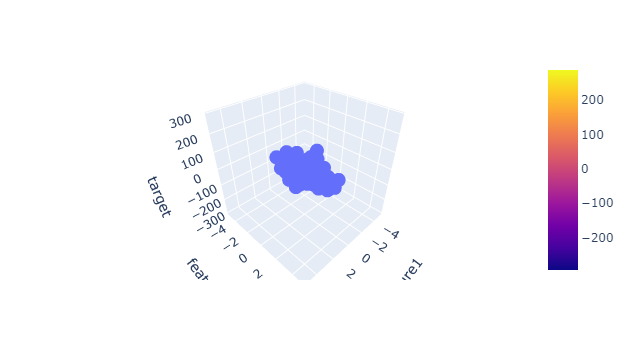

In [27]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()